Importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading data

In [2]:
data=pd.read_csv("abalone_csv.csv")
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.shape

(4177, 9)

In [4]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Class_number_of_rings'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex                      4177 non-null object
Length                   4177 non-null float64
Diameter                 4177 non-null float64
Height                   4177 non-null float64
Whole_weight             4177 non-null float64
Shucked_weight           4177 non-null float64
Viscera_weight           4177 non-null float64
Shell_weight             4177 non-null float64
Class_number_of_rings    4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
data["Class_number_of_rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

checking null value in data

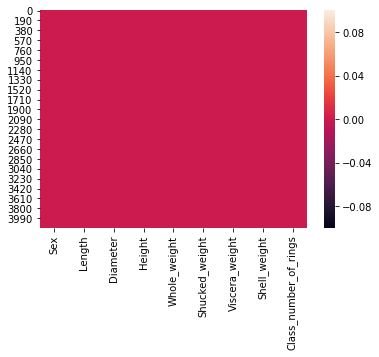

In [8]:
sns.heatmap(data.isnull())

correlation of variables

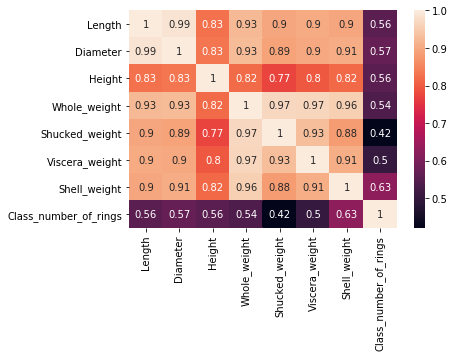

In [9]:
sns.heatmap(data.corr(),annot=True)

Exploting data(EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2DD7D04A8>,
      dtype=object)

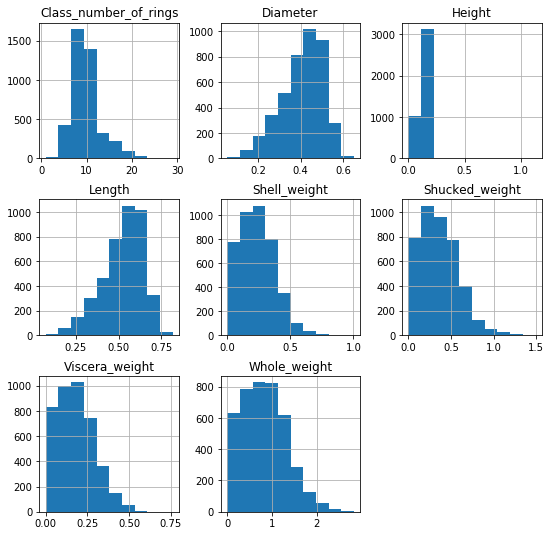

In [10]:
data.hist(figsize=(9,9))

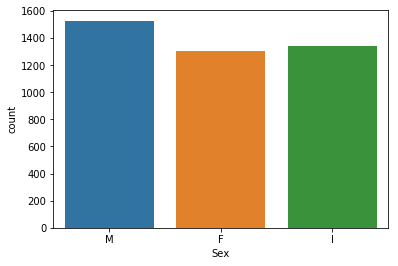

In [11]:
sns.countplot(data["Sex"])

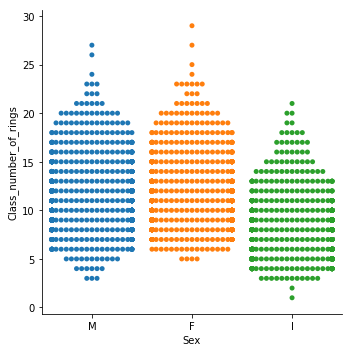

In [12]:
sns.catplot(x="Sex",y="Class_number_of_rings",data= data,kind="swarm")

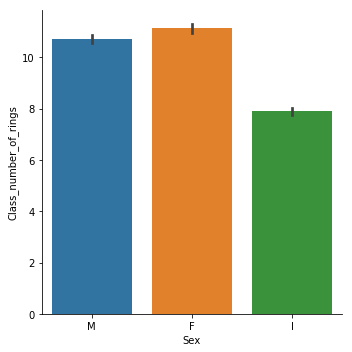

In [13]:
sns.catplot(x="Sex",y="Class_number_of_rings",data= data,kind="bar")

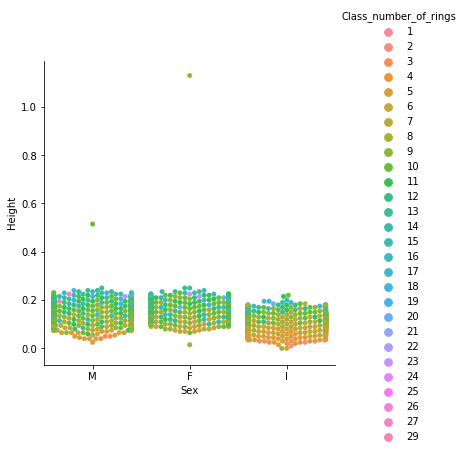

In [14]:
sns.catplot(x="Sex", y="Height",hue="Class_number_of_rings",data= data,kind="swarm")

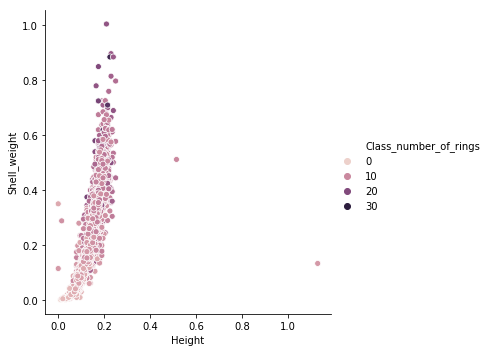

In [15]:
sns.relplot(x="Height",y="Shell_weight",hue="Class_number_of_rings",data=data)

In [16]:
sns.pairplot(data)

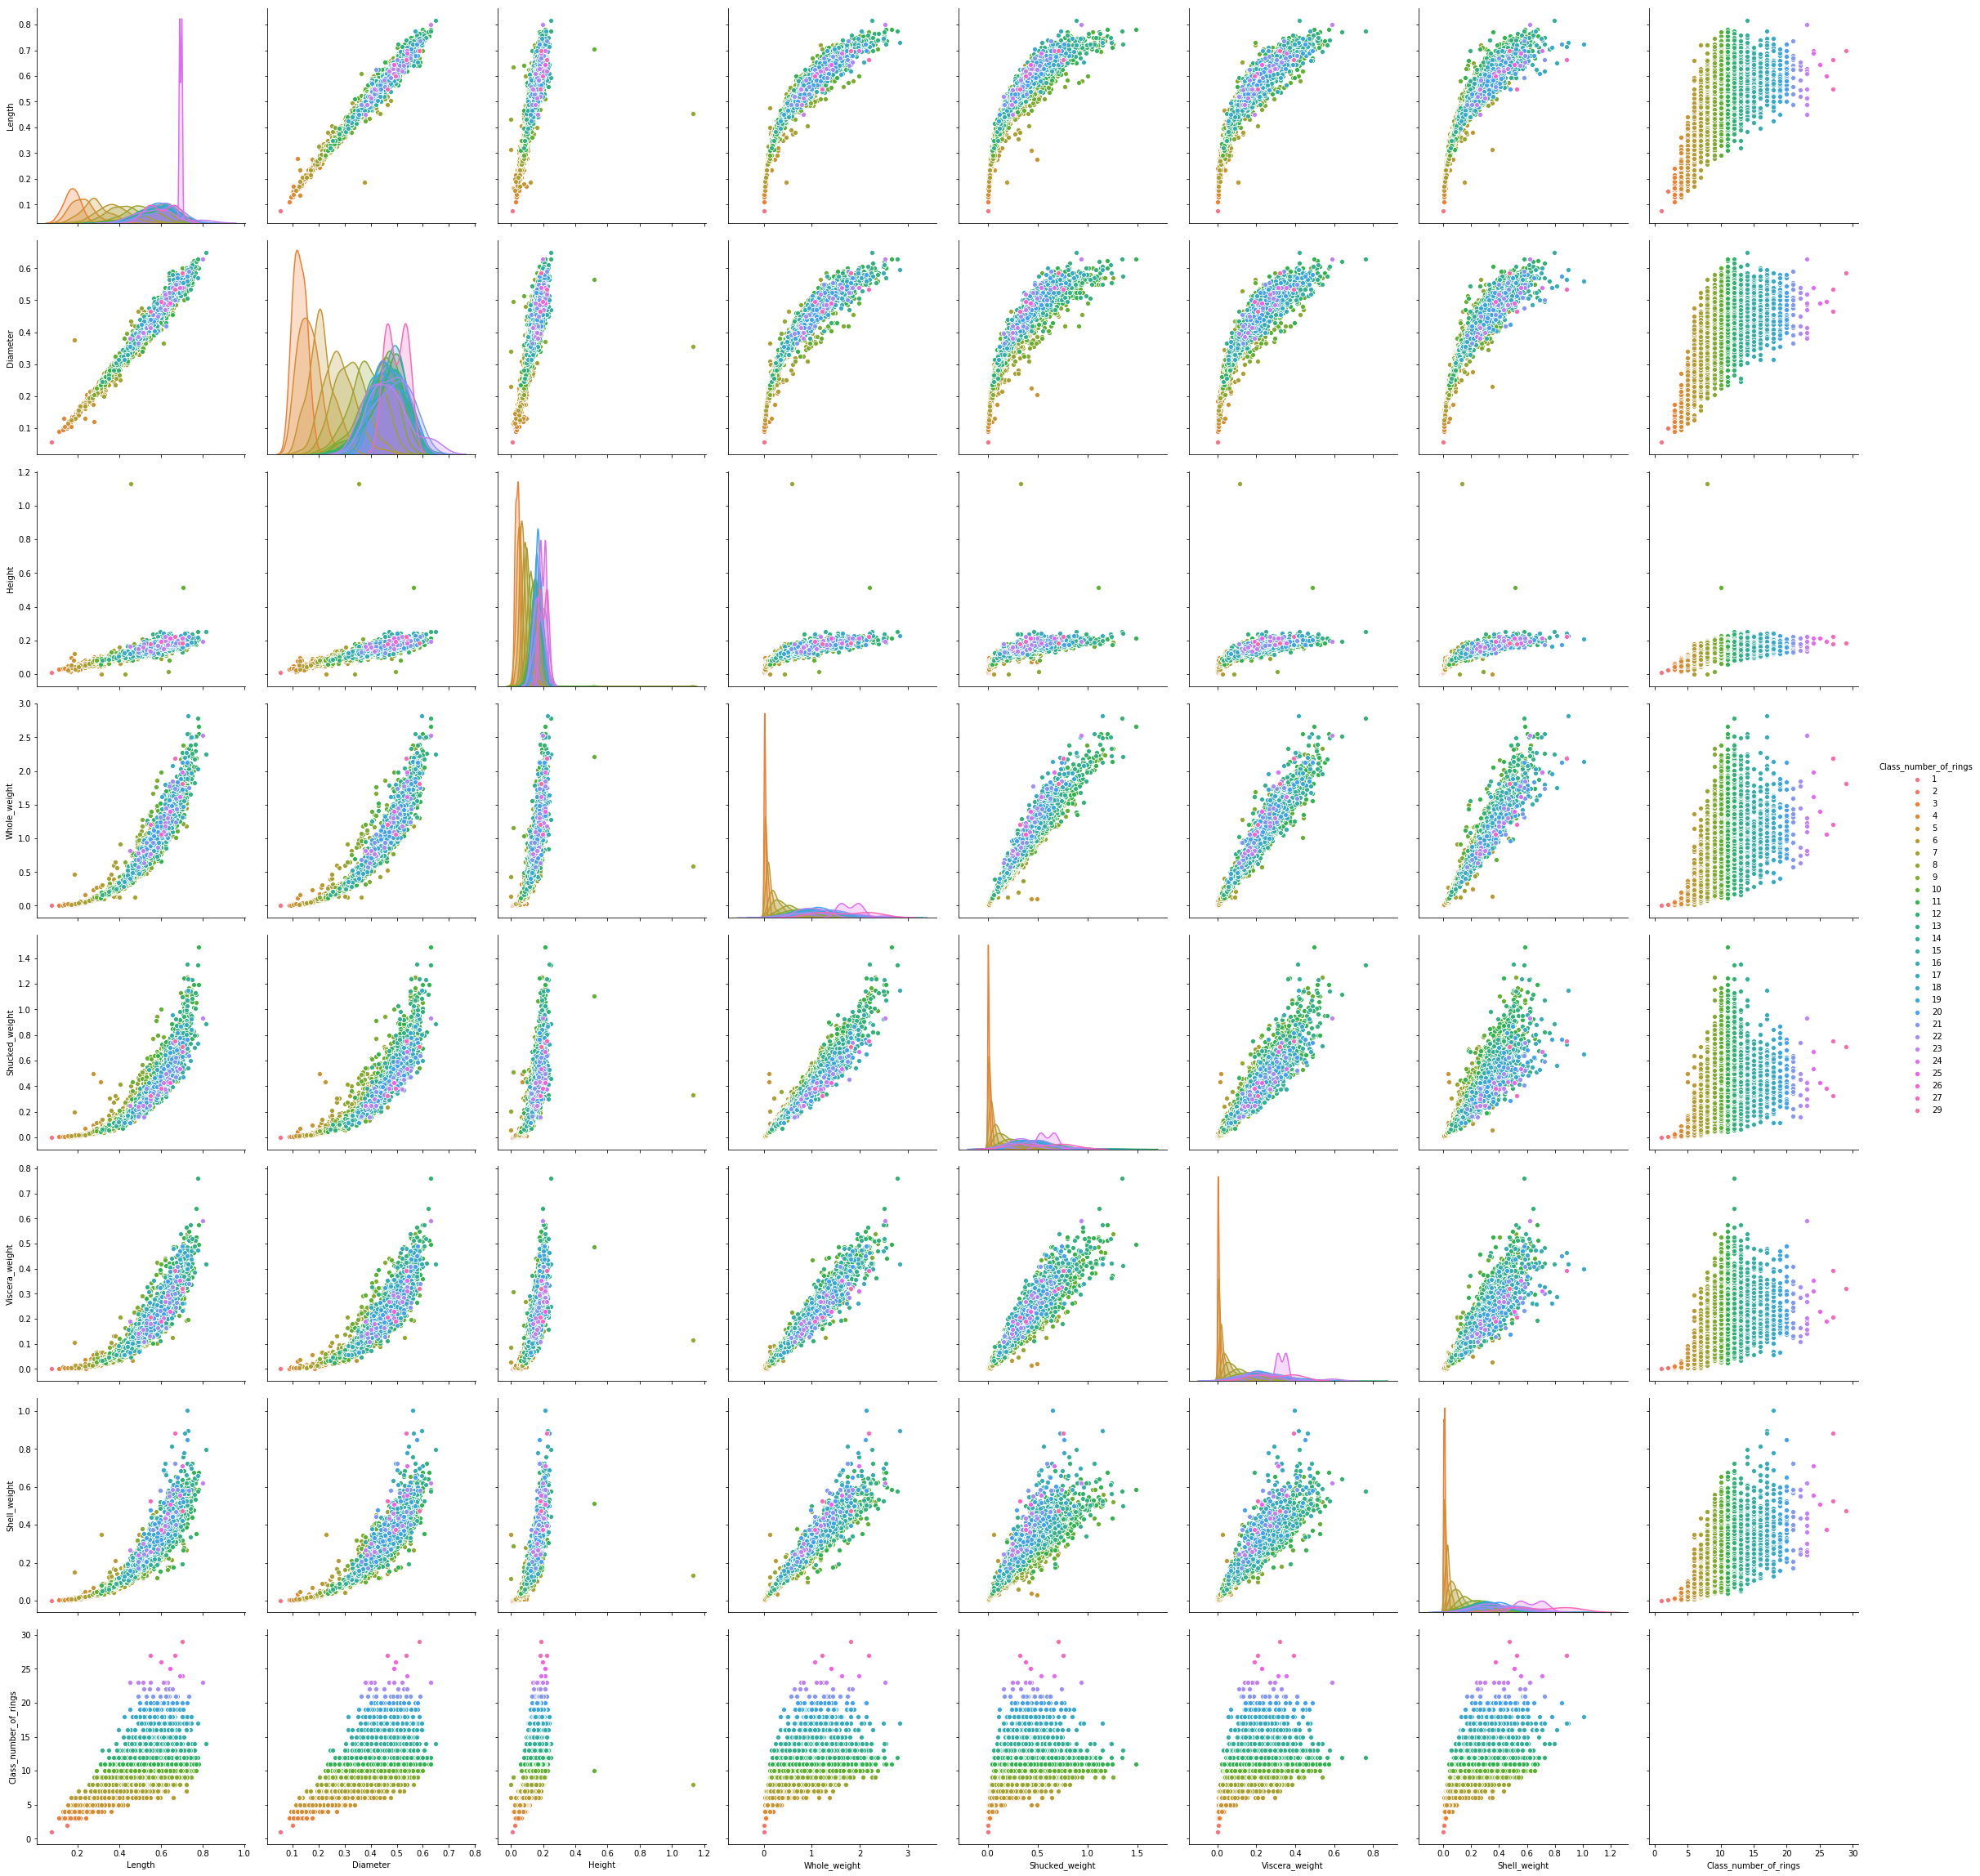

In [17]:
sns.pairplot(data,hue="Class_number_of_rings",height=4)

Replacing sex attribute into numeric

In [18]:
def code(sex):
    if sex=="M":
        label=1
    elif sex=="F":
        label=2
    else:
        label=0
    return label

In [19]:
data["Sex"]=data["Sex"].apply(lambda x:code(x))

In [20]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Removing outlier

In [21]:
from scipy.stats import zscore
newdata=data[(np.abs(zscore(data))<3).all(axis=1)]

In [22]:
newdata.shape

(4027, 9)

In [23]:
data.shape

(4177, 9)

seprating independent and dependent attributes

In [24]:
x=newdata.iloc[:,:-1]
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [25]:
y=newdata.iloc[:,-1]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Class_number_of_rings, dtype: int64

scaling of variable

In [26]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)

spliting the data 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

In [29]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3141, 8) (3141,) (886, 8) (886,)


Importing metrics

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Applying LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.coef_
lm.intercept_
pre=lm.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pre))
print('MSE = ',mean_squared_error(y_test,pre))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pre)))
print('R2_score = ',r2_score(y_test,pre))
print('Training_score = ',lm.score(x_train,y_train))

MAE =  1.467578192084747
MSE =  3.726738919181985
RMSE =  1.9304763451495552
R2_score =  0.5611780261945147
Training_score =  0.507503068774505


In [32]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
pred=la.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',la.score(x_train,y_train))

MAE =  2.2413819124187997
MSE =  8.500789666663966
RMSE =  2.915611370993049
R2_score =  -0.0009644843190568242
Training_score =  0.0


In [33]:
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(x_train,y_train)
pred=ri.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',ri.score(x_train,y_train))

MAE =  1.4742948626155812
MSE =  3.784812005214925
RMSE =  1.9454593301364398
R2_score =  0.5543399442170565
Training_score =  0.5033436291670217


In [34]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred=en.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',en.score(x_train,y_train))

MAE =  2.2413819124187997
MSE =  8.500789666663966
RMSE =  2.915611370993049
R2_score =  -0.0009644843190568242
Training_score =  0.0


Applying KNeighborsRegressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor()
kr.fit(x_train,y_train)
pred=kr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',kr.score(x_train,y_train))

MAE =  1.4620767494356661
MSE =  4.00058690744921
RMSE =  2.000146721480504
R2_score =  0.5289325382920613
Training_score =  0.6586046484344618


Applying DecisionTreeRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',dtr.score(x_train,y_train))

MAE =  1.8058690744920993
MSE =  6.340857787810384
RMSE =  2.518105992171573
R2_score =  0.25336660538656874
Training_score =  1.0


Ensemble Technique

Applying GradientBoostingRegressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',gbr.score(x_train,y_train))

MAE =  1.3515213714089178
MSE =  3.3726007178094237
RMSE =  1.8364641890898454
R2_score =  0.6028776536426169
Training_score =  0.6285580001218579


Applying AdaBoostRegressor

In [38]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',adb.score(x_train,y_train))

MAE =  1.6564915887252483
MSE =  4.2498358364053015
RMSE =  2.0615129969042885
R2_score =  0.49958357949850485
Training_score =  0.42633362226355653


Applying RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',rf.score(x_train,y_train))

MAE =  1.4720090293453725
MSE =  4.035846501128669
RMSE =  2.008941637063822
R2_score =  0.524780735649177
Training_score =  0.9063462748892941



Why I select GradientBoostingRegressor as final Model

I get maximum R2_score in GradientBoostingRegressor as compared to other model and we also achive the lowest Mean_Squared_Error in this model

GradientBoostingRegressor

MAE =  1.3522866753215088 
MSE =  3.3760529949312716 
RMSE =  1.8374038736574143 
R2_score =  0.6024711494324788

In [40]:
from sklearn.externals import joblib

In [41]:
joblib.dump(gbr,'model_ablone_data.csv')

['model_ablone_data.csv']

In [42]:
model=joblib.load('model_ablone_data.csv')

In [43]:
model.predict(x_test)

array([ 8.61082828, 10.17217478,  4.9384282 ,  8.81338621, 14.37806644,
        7.29806569, 12.15427706, 10.65780738, 10.44188658, 12.40129448,
       11.84615338,  9.80027228,  7.97420419,  8.83706771,  8.7294903 ,
       12.99725992, 11.01401399,  9.73680646, 10.22415161,  9.63697562,
       12.24664724,  5.03987824,  7.23855847,  5.0211626 ,  8.6833377 ,
       11.0433252 , 10.85435806,  8.42200078, 10.79742848,  9.32310134,
       11.61595556,  8.65863325,  6.1795873 , 10.29962641, 12.90159963,
       10.83402125, 10.79782145,  7.38005295,  7.22437492, 13.31537157,
       10.98474489, 14.37711899,  6.52441409,  5.22019521, 11.42928756,
       13.20041202,  7.8860103 ,  9.30324082, 10.8990753 ,  9.26843546,
        5.73779093,  5.72470494,  6.89588723,  7.15366554,  9.58958429,
        8.64435884,  9.37551243,  5.70353869, 11.32131774, 10.13539011,
       10.01315602,  7.58341045,  8.24977999,  9.8557702 ,  9.50667125,
        9.16089715,  6.38316799, 10.03870693,  7.34559175,  9.95